In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [31]:
# Datetime format generated by pH meter
DATETIME_FORMAT = '%d-%b-%y / %H:%M:%S'

# Calculates seconds between two datetimes
def calculate_seconds(dt, start_time):
    d = datetime.strptime(dt, DATETIME_FORMAT)
    diff = d - start_time
    return diff.days*86400 + diff.seconds

In [32]:
# List of sample files to import
# Format for each entry is
# ['filename (without .xlsx extension)', 'sample name -- to be displayed on graph']
samples = [
    ['olivine_ph_2_h2so4_20C', 'Olivine 20 C'],
    ['olivine_ph_2_h2so4_100C', 'Olivine 100 C'],
]

all_data = []

for s in samples:
    # Import each data file and set sample name
    data = pd.read_excel(s[0] + '.xlsx')
    data['Sample'] = s[1]
    
    # Drop ' pH' from all pH readings (i.e. change '2.05 pH' to '2.05')
    # and convert from string to float
    data['pH'] = data['Reading'].apply(lambda x: float(x.replace(' pH', '')))
    
    # First entry in data file is start time of experiment
    start_time = datetime.strptime(data.iloc[0]['Date/Time/Channel'], DATETIME_FORMAT)
    
    # Parse datetime string into seconds and then calculate minutes (since start time)
    data['Seconds'] = data['Date/Time/Channel'].apply(calculate_seconds, start_time=start_time)
    data['Minutes'] = data['Seconds'].apply(lambda x: x/60)
    
    all_data.append(data)

df = pd.concat(all_data, axis=0, ignore_index=True)

Text(0, 0.5, 'pH')

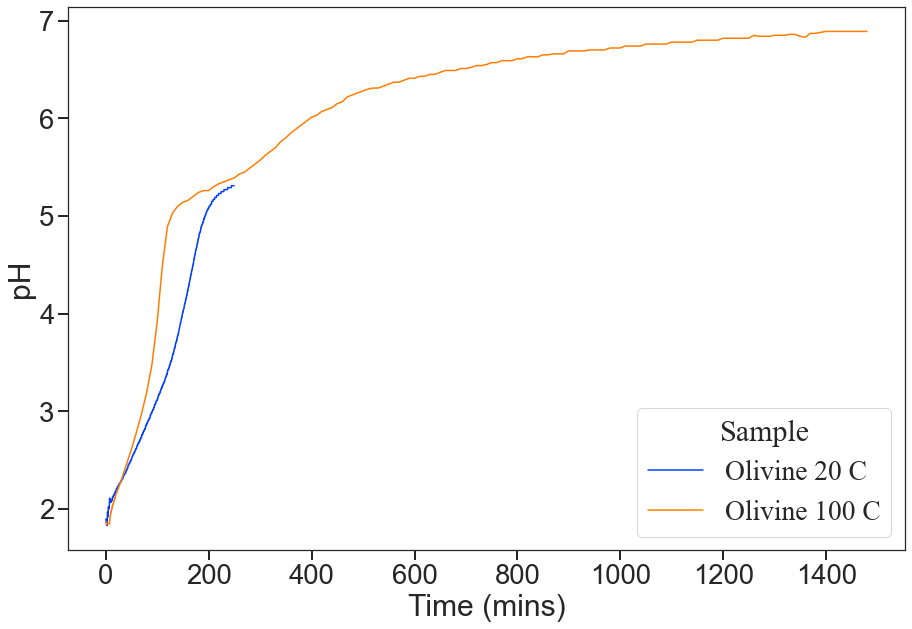

In [33]:
sns.set(font_scale = 2.5)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(bottom=True, left=True, width=2, length=10)
plt.rcParams["font.family"] = "Times New Roman"

plot = sns.lineplot(
    data=df,
    x="Minutes",
    y="pH",
    hue="Sample",
    dashes=False,
    palette='bright',
)

plot.set_xlabel('Time (mins)')
plot.set_ylabel('pH')

# ------ Some optional graph settings that I frequently use -----

# Set x and y limits to zoom in on a certain section
# ax.set_xlim(0, 300)
# ax.set_ylim(2, 5)

# Draw a horizontal line at a specific pH
# plt.axhline(y=5.5, color='r', linestyle='--')

# Move lengend the the right side of the plot
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save figure as svg to current directory
# I use Adobe Illustrator to add additional annotations
# plt.savefig('filename.svg')